## **Shreya Akurathi** 
## **200968188**
## **Lab 1 - Ex1**
## **30/01/23**

#**1.Use the FashionMNIST data set and train a basic autoencoder to reconstruct images.**

Train the  model  using  x_train  as both the  input and the  target.  The  encoder shouldlearn  to  compress  the  dataset  from  784  dimensions  to  the  latent  space,  and  the decoder should learn to reconstruct the original images.

Let the autoencoder have two Dense layers: 

  a.an encoder, which compresses the images into a 64 dimensional latent vector, use reLU as activation function.
  
  b.and a decoder, that reconstructs the original image from the latent space, use sigmoid as activation function.

the model is trained for atleast 10 epochs, with loss function as mean square error, test it by encoding and decoding images from the test set. Display original and reconstructed images.


***Import neccesary libraries***

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

from imgaug import augmenters
from random import randint

from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.layers import Flatten,Dense, Input, Conv2D,MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal

***Files import***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/fashion-mnist_test.csv")

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(60000, 785)

***Train test split ***

In [ ]:
X_train = train.drop(["label"], axis=1).values
Y_train = train.label.values
X_test = test.drop(["label"], axis=1).values
Y_test = test.label.values

In [ ]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (60000, 784)
Y_train shape: (60000,)
X_test shape: (10000, 784)
Y_test shape: (10000,)


***Normalise the data ***

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

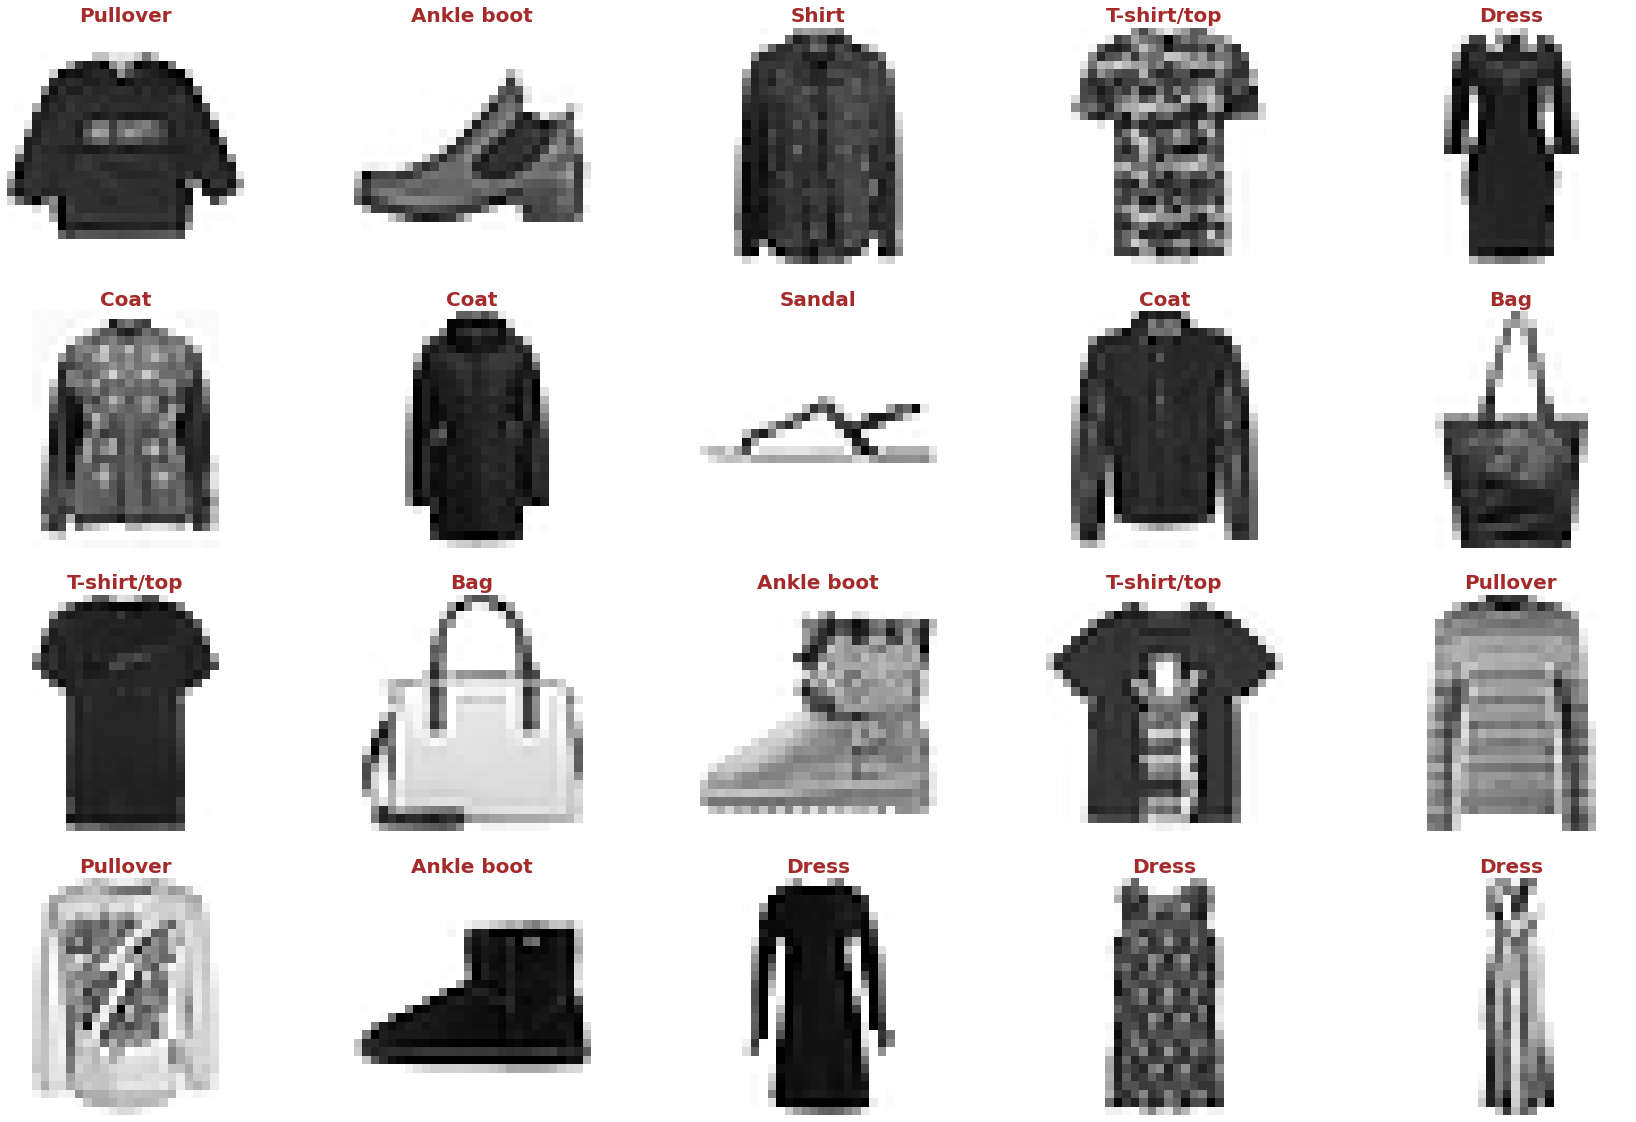

In [ ]:
plt.figure(figsize=(30,20))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gist_yarg")
    plt.title("T-shirt/top" if Y_train[i] == 0 
              else "Trouser" if Y_train[i] == 1
              else "Pullover" if Y_train[i] == 2
              else "Dress" if Y_train[i] == 3
              else "Coat" if Y_train[i] == 4
              else "Sandal" if Y_train[i] == 5
              else "Shirt" if Y_train[i] == 6
              else "Sneaker" if Y_train[i] == 7
              else "Bag" if Y_train[i] == 8
              else "Ankle boot", size = 20, color = "brown", fontweight = "bold")
    plt.axis("off")
    
plt.show()

# **Autoencoder**

In [ ]:
input = Input(shape = (784,))

In [ ]:
en= Dense(64, activation="relu")(input)

de = Dense(784, activation="sigmoid")(en)


In [ ]:
autoencoder = Model(input, de)

In [ ]:
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
hist = autoencoder.fit(X_train, 
                       X_train,
                       epochs=10, 
                       batch_size=256, 
                       shuffle=True,
                       validation_data=(X_train, X_train))

Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.0522 - val_loss: 0.0282
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0238 - val_loss: 0.0203
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0181 - val_loss: 0.0162
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0101 - val_loss: 0.01

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
encoder = Model(input, en)
encoded_img = encoder.predict(X_test)


313/313 [==============================] - 0s 1ms/step


In [ ]:
decoded_imgs = autoencoder.predict(X_test) 

313/313 [==============================] - 0s 1ms/step


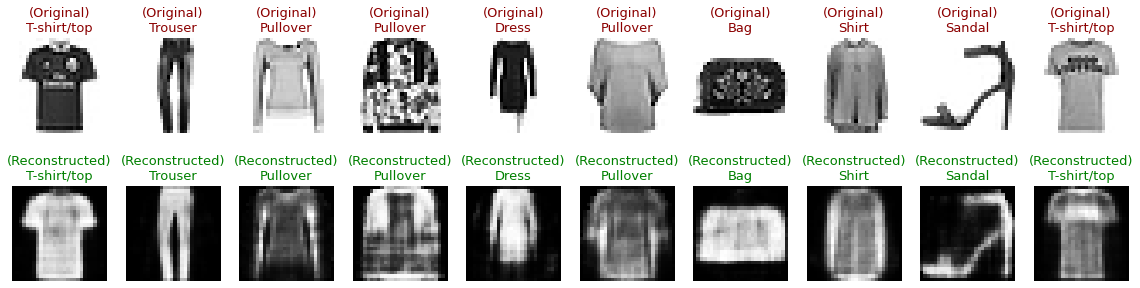

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(10):
    
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gist_yarg")
    plt.title("(Original)\nT-shirt/top" if Y_test[i] == 0 
              else "(Original)\nTrouser" if Y_test[i] == 1
              else "(Original)\nPullover" if Y_test[i] == 2
              else "(Original)\nDress" if Y_test[i] == 3
              else "(Original)\nCoat" if Y_test[i] == 4
              else "(Original)\nSandal" if Y_test[i] == 5
              else "(Original)\nShirt" if Y_test[i] == 6
              else "(Original)\nSneaker" if Y_test[i] == 7
              else "(Original)\nBag" if Y_test[i] == 8
              else "(Original)\nAnkle boot", size = 13, color = "darkred")
    plt.axis("off")

    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title("(Reconstructed)\nT-shirt/top" if Y_test[i] == 0 
              else "(Reconstructed)\nTrouser" if Y_test[i] == 1
              else "(Reconstructed)\nPullover" if Y_test[i] == 2
              else "(Reconstructed)\nDress" if Y_test[i] == 3
              else "(Reconstructed)\nCoat" if Y_test[i] == 4
              else "(Reconstructed)\nSandal" if Y_test[i] == 5
              else "(Reconstructed)\nShirt" if Y_test[i] == 6
              else "(Reconstructed)\nSneaker" if Y_test[i] == 7
              else "(Reconstructed)\nBag" if Y_test[i] == 8
              else "(Reconstructed)\nAnkle boot", size = 13, color = "green")
    plt.axis("off")

plt.show()